<a href="https://colab.research.google.com/github/paulrobustelli/python_demos/blob/main/Chem6_Linear_Exponential_Fits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np

# Data points (x, y) from the graph
x_values = np.array([0,0.02, 0.04, 0.06, 0.08])
y_values = np.array([0,0.05, 0.20, 0.30, 0.38])

# Combine x and y values into a single NumPy array
data_array = np.column_stack((x_values, y_values))

# Print the resulting array
print(data_array)

[[0.   0.  ]
 [0.02 0.05]
 [0.04 0.2 ]
 [0.06 0.3 ]
 [0.08 0.38]]


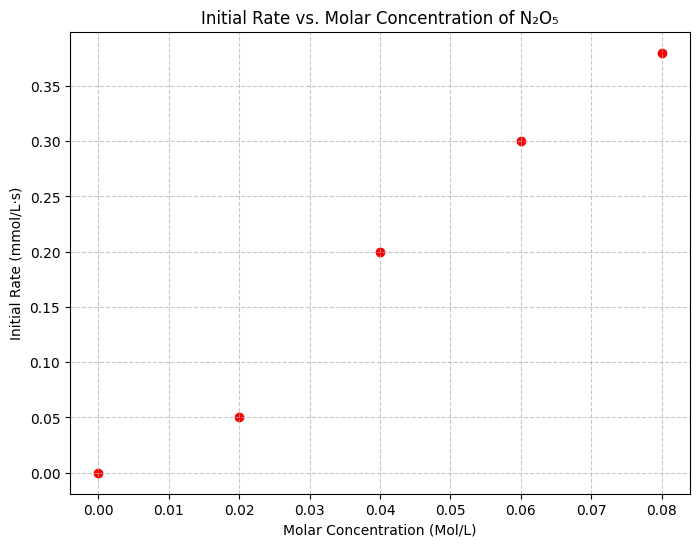

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Data points (x, y) from the graph (approximate)
x_values = np.array([0,0.02, 0.04, 0.06, 0.08])
y_values = np.array([0,0.05, 0.20, 0.30, 0.38])

# Create the plot (without a line)
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, marker='o', color='red')  # Use plt.scatter()

# Add labels and title
plt.xlabel("Molar Concentration (Mol/L)")
plt.ylabel("Initial Rate (mmol/L·s)")
plt.title("Initial Rate vs. Molar Concentration of N₂O₅")

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Slope: 5.05
Intercept: -0.015999999999999986
R-squared: 0.9816204772902233
Residuals: [ 0.016 -0.035  0.014  0.013 -0.008]


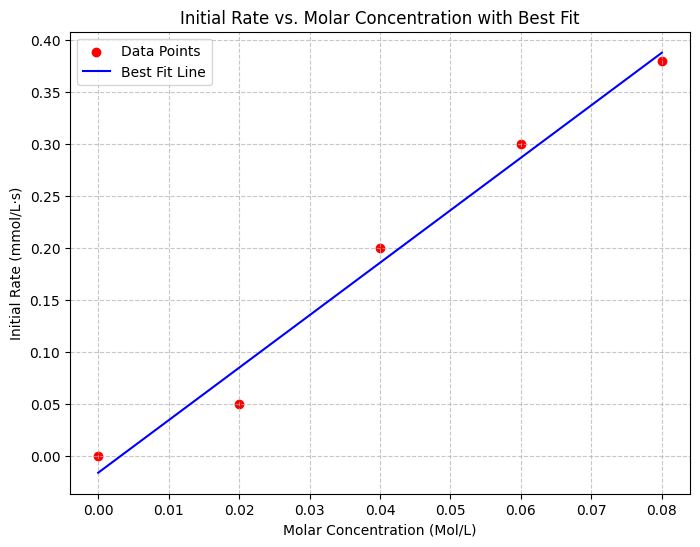

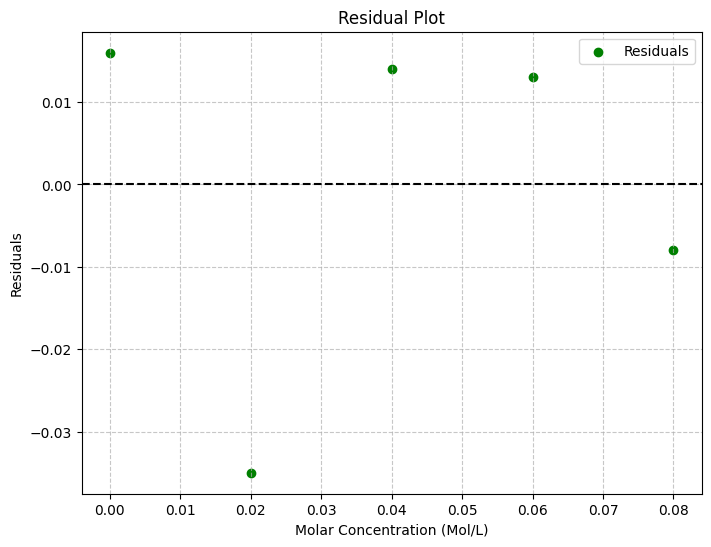

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Data points (x, y) from the graph (approximate)
x_values = np.array([0,0.02, 0.04, 0.06, 0.08])
y_values = np.array([0,0.05, 0.20, 0.30, 0.38])

# Calculate the linear regression (best fit line)
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create the best fit line
best_fit_line = slope * x_values + intercept

# Calculate residuals
residuals = y_values - best_fit_line

# Print the regression results and residuals
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("Residuals:", residuals)

# Plot the original data and the best fit line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, marker='o', color='red', label="Data Points")
plt.plot(x_values, best_fit_line, color='blue', label="Best Fit Line")

# Add labels and title
plt.xlabel("Molar Concentration (Mol/L)")
plt.ylabel("Initial Rate (mmol/L·s)")
plt.title("Initial Rate vs. Molar Concentration with Best Fit")
plt.legend()

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(x_values, residuals, color='green', label="Residuals")
plt.axhline(y=0, color='black', linestyle='--') # Add a horizontal line at y=0 for reference
plt.xlabel("Molar Concentration (Mol/L)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 10.1  # Rate constant (s^-1)
initial_concentration = 2.0  # Initial concentration (M)
time_points = np.linspace(0, 0.5, 25)  # Time points (s) - Increased to 50 points,time from 0 1.0s
noise_level = 0.02  # Standard deviation of the noise - reduced noise level

# First-order integrated rate law: [A]t = [A]0 * exp(-kt)
concentration_values = initial_concentration * np.exp(-k * time_points)

# Add random noise (normal distribution)
noise = np.random.normal(0, noise_level, len(time_points))
noisy_concentration_values = concentration_values + noise

# Ensure concentrations don't go negative (clip at zero)
noisy_concentration_values = np.maximum(noisy_concentration_values, 0)

# Create the 2D array
data_array = np.column_stack((time_points, noisy_concentration_values))

# Print the 2D array
print(data_array)


[[0.         2.0465792 ]
 [0.02083333 1.60302939]
 [0.04166667 1.33809677]
 [0.0625     1.03429731]
 [0.08333333 0.87629575]
 [0.10416667 0.7125151 ]
 [0.125      0.55270581]
 [0.14583333 0.49443918]
 [0.16666667 0.39703276]
 [0.1875     0.30648126]
 [0.20833333 0.26714026]
 [0.22916667 0.16366503]
 [0.25       0.16463912]
 [0.27083333 0.09551926]
 [0.29166667 0.10629521]
 [0.3125     0.11166091]
 [0.33333333 0.06381347]
 [0.35416667 0.04678362]
 [0.375      0.07176118]
 [0.39583333 0.03391527]
 [0.41666667 0.0342822 ]
 [0.4375     0.01541831]
 [0.45833333 0.02152787]
 [0.47916667 0.03866668]
 [0.5        0.02219393]]


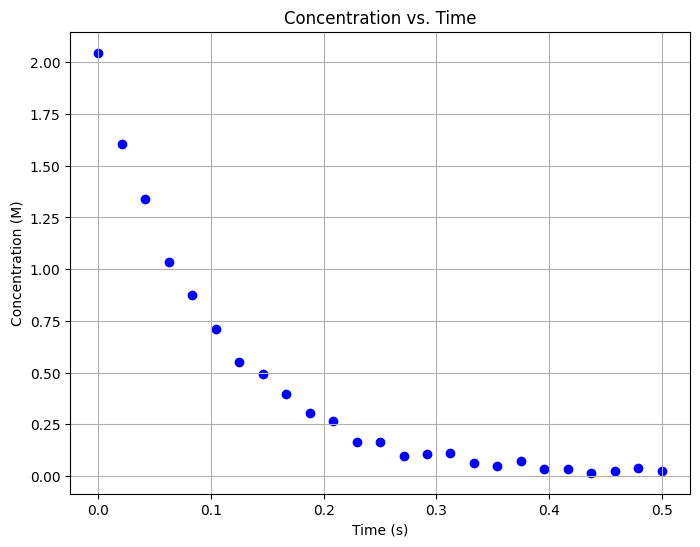

In [64]:

# Plot the data
plt.figure(figsize=(8, 6))  # Adjust figure size for better viewing
plt.scatter(data_array[:, 0], data_array[:, 1], marker='o', linestyle='-', color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Concentration (M)")
plt.title("Concentration vs. Time")
plt.grid(True)
plt.show()


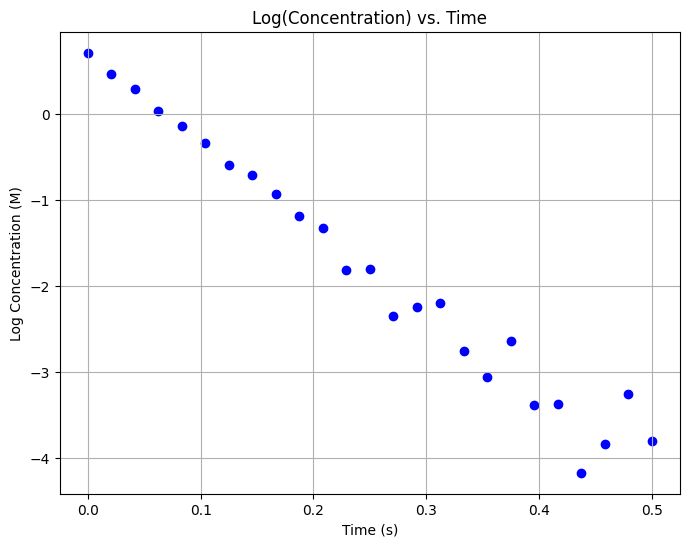

In [65]:
log_concentration=np.log(data_array[:, 1])
plt.figure(figsize=(8, 6))  # Adjust figure size for better viewing
plt.scatter(data_array[:, 0], log_concentration, marker='o', linestyle='-', color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Log Concentration (M)")
plt.title("Log(Concentration) vs. Time")
plt.grid(True)
plt.show()

Slope: -9.541474146831096
Intercept: 0.6111887464499521
R-squared: 0.9706929948825995
Residuals: [ 0.10498097  0.05948717  0.07762096  0.01887566  0.05188247  0.04376064
 -0.01143388  0.0759451   0.05532047 -0.00476101  0.05663694 -0.23453433
 -0.02981954 -0.37546685 -0.0697938   0.17823336 -0.18248827 -0.2941388
  0.33245249 -0.21824502 -0.00870365 -0.6089934  -0.07641985  0.70799048
  0.35161172]


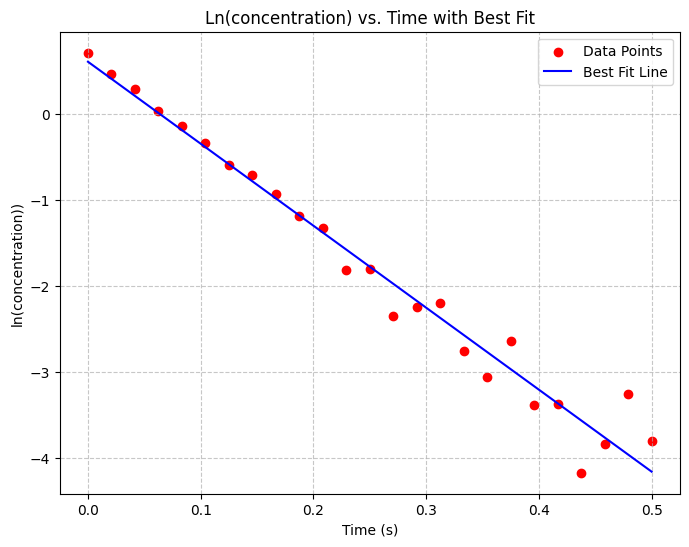

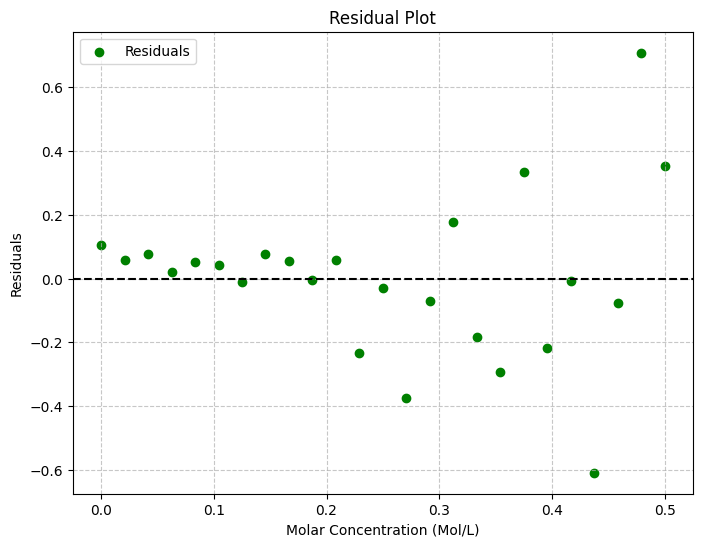

In [67]:
x_values = data_array[:, 0]
y_values = log_concentration

# Calculate the linear regression (best fit line)
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create the best fit line
best_fit_line = slope * x_values + intercept

# Calculate residuals
residuals = y_values - best_fit_line

# Print the regression results and residuals
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("Residuals:", residuals)

# Plot the original data and the best fit line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, marker='o', color='red', label="Data Points")
plt.plot(x_values, best_fit_line, color='blue', label="Best Fit Line")

# Add labels and title
plt.xlabel("Time (s)")
plt.ylabel("ln(concentration))")
plt.title("Ln(concentration) vs. Time with Best Fit")
plt.legend()

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(x_values, residuals, color='green', label="Residuals")
plt.axhline(y=0, color='black', linestyle='--') # Add a horizontal line at y=0 for reference
plt.xlabel("Molar Concentration (Mol/L)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Slope: -9.5415 ± 0.3457
Intercept: 0.6112 ± 0.1342
R-squared: 0.9707


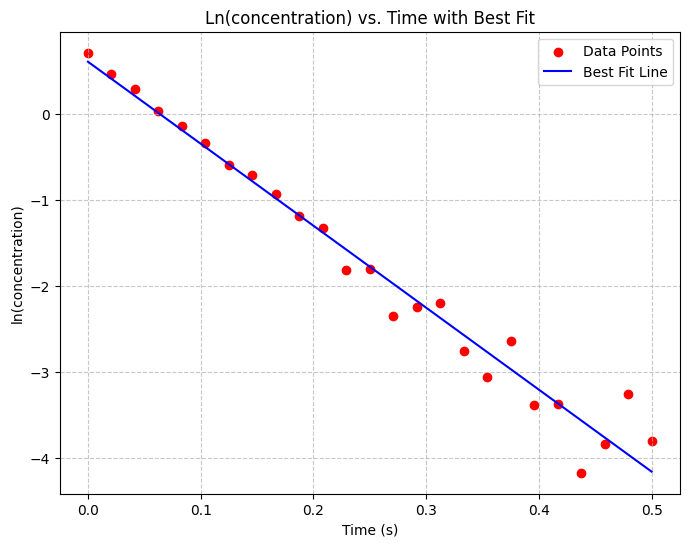

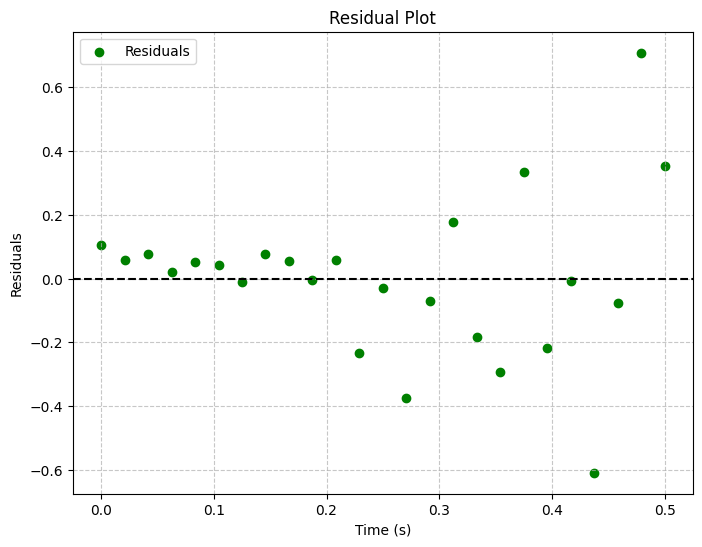

In [70]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

x_values = data_array[:, 0]
y_values = log_concentration

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate best fit line
best_fit_line = slope * x_values + intercept

# Calculate residuals
residuals = y_values - best_fit_line

# Estimate standard error of intercept
n = len(x_values)
mean_x = np.mean(x_values)
ssx = np.sum((x_values - mean_x)**2)
intercept_stderr = std_err * np.sqrt(np.sum(x_values**2) / (n * ssx))

# Print regression results with error estimates
print(f"Slope: {slope:.4f} ± {std_err:.4f}")
print(f"Intercept: {intercept:.4f} ± {intercept_stderr:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Plot the data and best fit line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, marker='o', color='red', label="Data Points")
plt.plot(x_values, best_fit_line, color='blue', label="Best Fit Line")
plt.xlabel("Time (s)")
plt.ylabel("ln(concentration)")
plt.title("Ln(concentration) vs. Time with Best Fit")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(x_values, residuals, color='green', label="Residuals")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Fitted Initial Concentration (a): 2.0194
Fitted Rate Constant (k): 10.1121


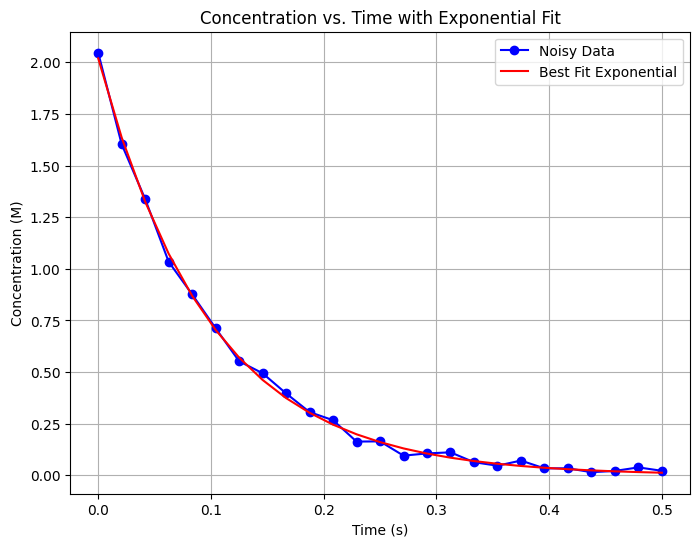

In [68]:
from scipy.optimize import curve_fit

# Define the exponential function for fitting
def exponential_decay(t, a, k):
    return a * np.exp(-k * t)

# Use curve_fit to find the best fit parameters
popt, pcov = curve_fit(exponential_decay, data_array[:, 0], data_array[:, 1], p0=(initial_concentration, k))
a_fit, k_fit = popt

# Generate the best fit line using the fitted parameters
best_fit_line = exponential_decay(data_array[:, 0], a_fit, k_fit)

# Print the fitted parameters
print(f"Fitted Initial Concentration (a): {a_fit:.4f}")
print(f"Fitted Rate Constant (k): {k_fit:.4f}")

# Plot the data and the best fit line
plt.figure(figsize=(8, 6))
plt.plot(data_array[:, 0], data_array[:, 1], marker='o', linestyle='-', color='blue', label="Noisy Data")
plt.plot(data_array[:, 0], best_fit_line, color='red', label="Best Fit Exponential")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (M)")
plt.title("Concentration vs. Time with Exponential Fit")
plt.grid(True)
plt.legend()
plt.show()

Fitted Initial Concentration (a): 2.0194 ± 0.0163
Fitted Rate Constant (k): 10.1121 ± 0.1275


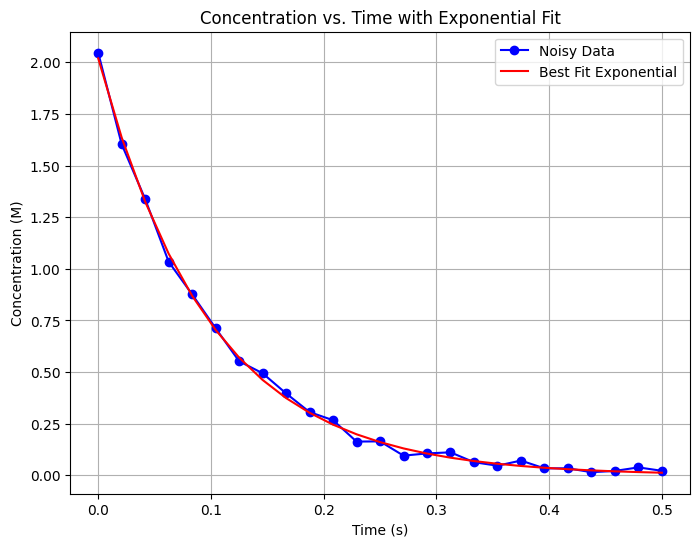

In [69]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Define the exponential function for fitting
def exponential_decay(t, a, k):
    return a * np.exp(-k * t)

# Fit the data
popt, pcov = curve_fit(
    exponential_decay,
    data_array[:, 0],
    data_array[:, 1],
    p0=(initial_concentration, k)
)

a_fit, k_fit = popt
a_err, k_err = np.sqrt(np.diag(pcov))  # Standard deviations (errors)

# Generate the best fit line using the fitted parameters
best_fit_line = exponential_decay(data_array[:, 0], a_fit, k_fit)

# Print the fitted parameters with errors
print(f"Fitted Initial Concentration (a): {a_fit:.4f} ± {a_err:.4f}")
print(f"Fitted Rate Constant (k): {k_fit:.4f} ± {k_err:.4f}")

# Plot the data and the best fit line
plt.figure(figsize=(8, 6))
plt.plot(data_array[:, 0], data_array[:, 1], marker='o', linestyle='-', color='blue', label="Noisy Data")
plt.plot(data_array[:, 0], best_fit_line, color='red', label="Best Fit Exponential")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (M)")
plt.title("Concentration vs. Time with Exponential Fit")
plt.grid(True)
plt.legend()
plt.show()